Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix


In [3]:
# Load the dataset
df = pd.read_csv("../data/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Drop the 'id' column as it is not useful for prediction
df=df.drop(columns=['id'])

In [5]:
df.shape

(400, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [7]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
# Replace missing value indicators with NaN
df.replace(['?', '\t?', ' ?', '\t'], np.nan, inplace=True)


In [9]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
# Check the distribution of the target variable
df['classification'].value_counts()


classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [11]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
df.shape

(400, 25)

In [13]:
# Clean and encode the target variable as binary: ckd = 1, notckd = 0
df['classification'] = df['classification'].astype(str).str.strip()
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

In [14]:
# Define categorical and numerical features
categorical_features = [
    'rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'
]

numerical_features = [
    'age','bp','sg','al','su','bgr','bu','sc',
    'sod','pot','hemo','pcv','wc','rc'
]

In [15]:
# Convert numerical features to numeric dtype
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
# Impute missing values in numerical features with median
for col in numerical_features:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\vichu\AppData\Local\Temp\ipykernel_18248\848959846.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [17]:
# Impute missing values in categorical features with mode
for col in categorical_features:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace("nan", np.nan)

In [18]:
df.isnull().sum().sum()

234

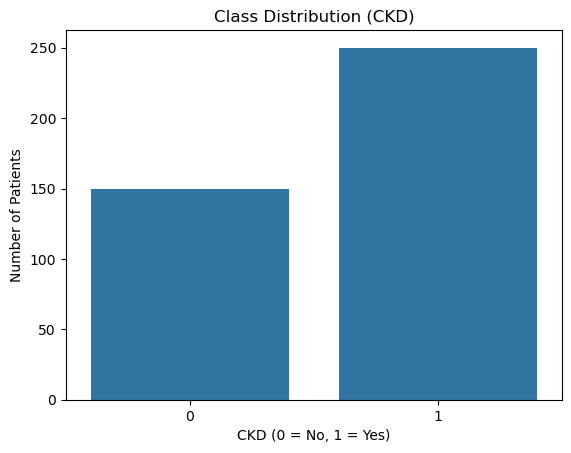

In [19]:
#class distribution
sns.countplot(x='classification', data=df)
plt.title("Class Distribution (CKD)")
plt.xlabel("CKD (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()

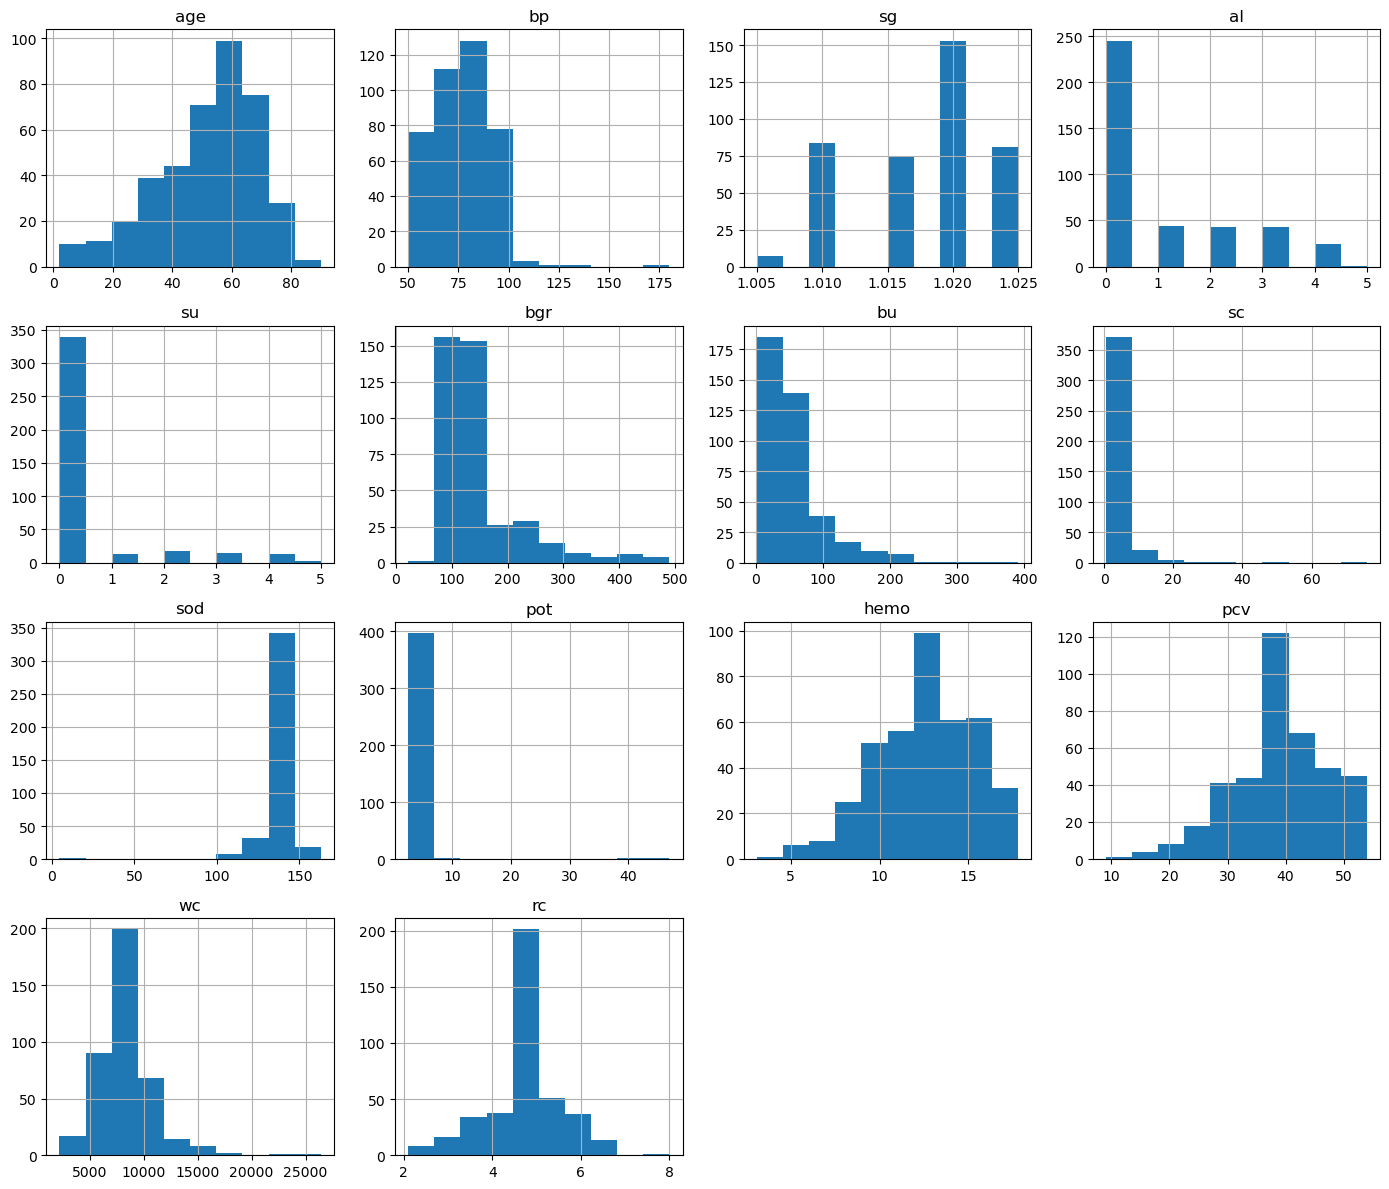

In [20]:
# distributions of numerical features
df[numerical_features].hist(figsize=(14,12))
plt.tight_layout()
plt.show()

In [21]:
# Correlation of numeric features with the target
corr_with_target = df[numerical_features + ['classification']].corr()['classification'] \
    .drop('classification') \
    .sort_values(ascending=False)

print("Correlation with target (classification):")
print(corr_with_target)


Correlation with target (classification):
al      0.531562
bgr     0.379321
bu      0.369393
su      0.294555
bp      0.293693
sc      0.291245
age     0.227842
wc      0.177571
pot     0.065218
sod    -0.334900
rc     -0.566163
sg     -0.659504
pcv    -0.673129
hemo   -0.726368
Name: classification, dtype: float64


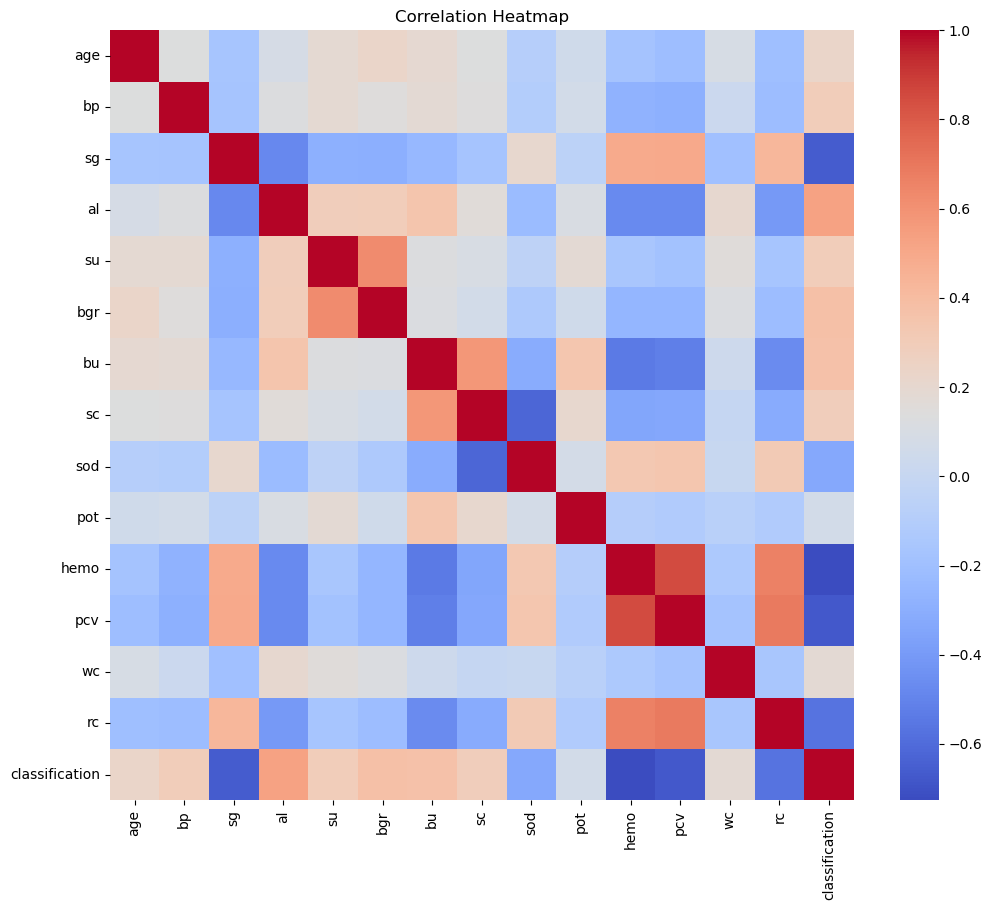

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features + ['classification']].corr(),
            cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

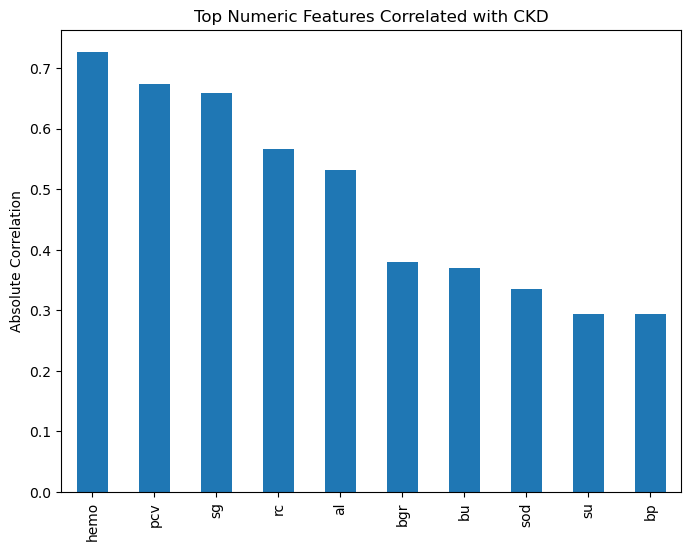

In [23]:
plt.figure(figsize=(8,6))
corr_with_target.abs().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Absolute Correlation")
plt.title("Top Numeric Features Correlated with CKD")
plt.show()

In [24]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

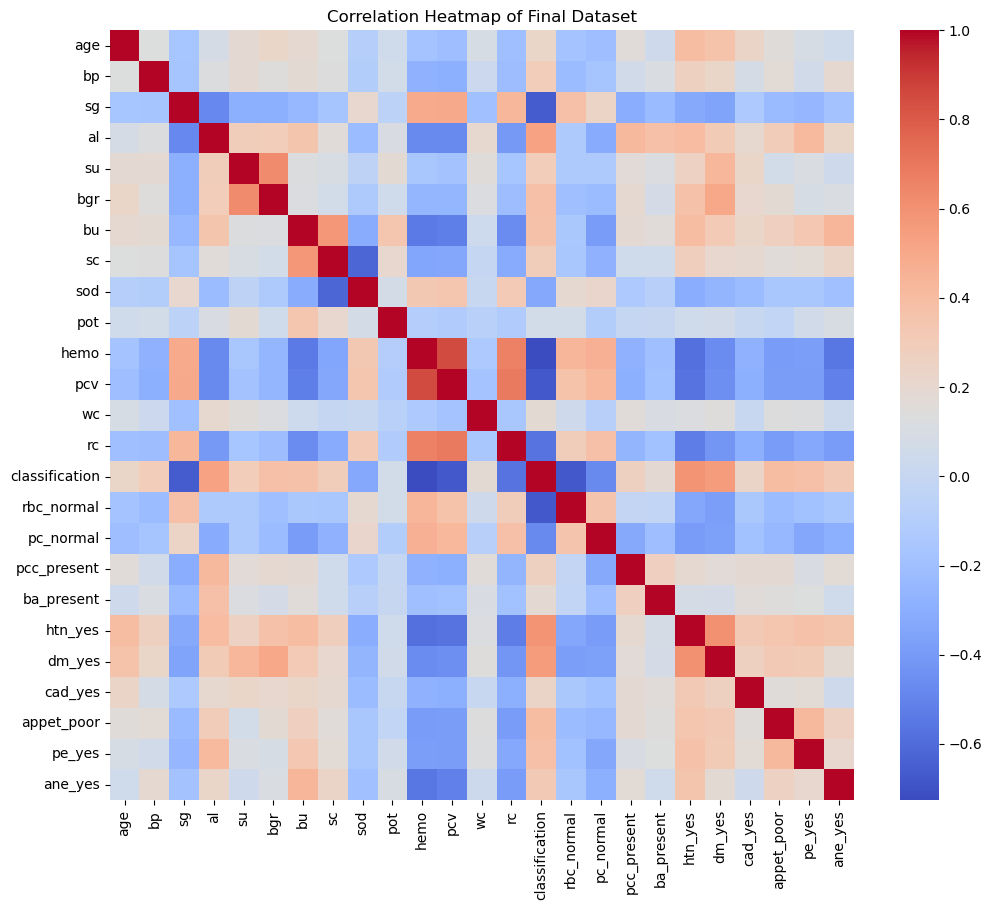

In [25]:
# Correlation heatmap of final dataset
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Final Dataset")
plt.show()

In [ ]:
X = df_encoded.drop('classification', axis=1)
y = df_encoded['classification']

print('X shape:', X.shape)
print('y distribution:', y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('y_train distribution:', y_train.value_counts())
print('y_test distribution:', y_test.value_counts())


X shape: (400, 24)
y distribution: classification
1    250
0    150
Name: count, dtype: int64
y_train distribution: classification
1    200
0    120
Name: count, dtype: int64
y_test distribution: classification
1    50
0    30
Name: count, dtype: int64


In [27]:
df_encoded.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,False,True,False,False,True,True,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,False,True,False,False,False,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,True,True,False,False,False,True,False,True,False,True
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,True,False,True,False,True,False,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,True,True,False,False,False,False,False,False,False,False


In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
df_encoded.shape

(400, 25)

In [30]:
df_encoded['classification'].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

 Decision Tree Classification



In [31]:
#Base Decision Tree Classifier
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#accuracy
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.975


In [32]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.98      0.98      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [33]:
print("Baseline Training Accuracy:", dt.score(X_train, y_train))
print("Baseline Test Accuracy:", dt.score(X_test, y_test))

print("Baseline Tree Depth:", dt.get_depth())
print("Baseline Number of Leaves:", dt.get_n_leaves())

Baseline Training Accuracy: 1.0
Baseline Test Accuracy: 0.975
Baseline Tree Depth: 6
Baseline Number of Leaves: 11


In [34]:
#compute pruning path
dt_alpha=DecisionTreeClassifier(random_state=42)
path=dt_alpha.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

print("number of candidate alphas:", len(ccp_alphas))

number of candidate alphas: 6


In [35]:
# Train decision trees for each alpha value
train_accuracies = []
test_accuracies = []

for alpha in ccp_alphas:
    dt_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt_alpha.fit(X_train, y_train)

    train_acc = dt_alpha.score(X_train, y_train)
    test_acc = dt_alpha.score(X_test, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


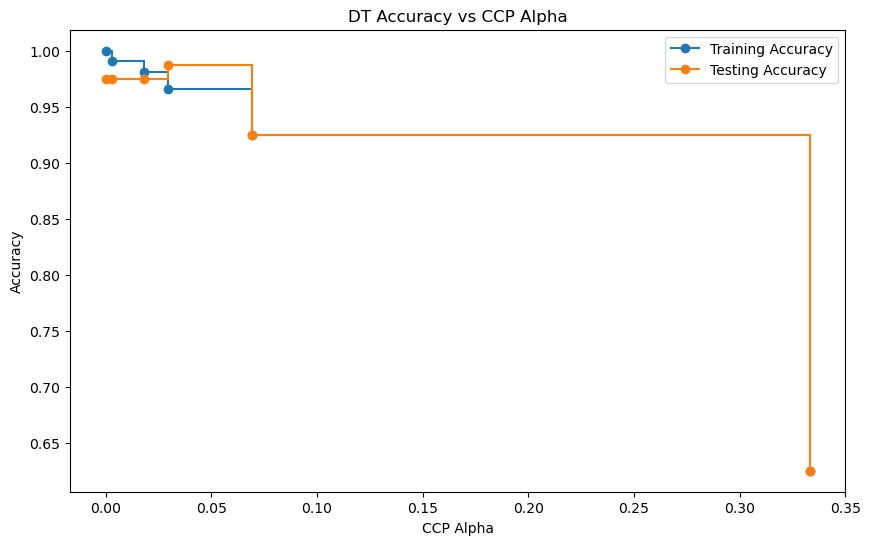

In [36]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label='Training Accuracy',drawstyle='steps-post')
plt.plot(ccp_alphas, test_accuracies, marker='o', label='Testing Accuracy',drawstyle='steps-post')
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("DT Accuracy vs CCP Alpha")
plt.legend()
plt.show()

In [37]:
best_index = test_accuracies.index(max(test_accuracies))
best_alpha = ccp_alphas[best_index]

print("Best ccp_alpha:", best_alpha)
print("Best test accuracy:", test_accuracies[best_index])


Best ccp_alpha: 0.029467468805704115
Best test accuracy: 0.9875


In [38]:
# Final Decision Tree with best alpha
final_dt = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=best_alpha
)

final_dt.fit(X_train, y_train)

# Final predictions
y_test_pred_final = final_dt.predict(X_test)
y_train_pred_final = final_dt.predict(X_train)

print("Final Training Accuracy:", accuracy_score(y_train, y_train_pred_final))
print("Final Test Accuracy:", accuracy_score(y_test, y_test_pred_final))
print("\nFinal Classification Report:")
print(classification_report(y_test, y_test_pred_final))
print("Final Tree Depth:", final_dt.get_depth())
print("Final Number of Leaves:", final_dt.get_n_leaves())


Final Training Accuracy: 0.965625
Final Test Accuracy: 0.9875

Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Final Tree Depth: 2
Final Number of Leaves: 3


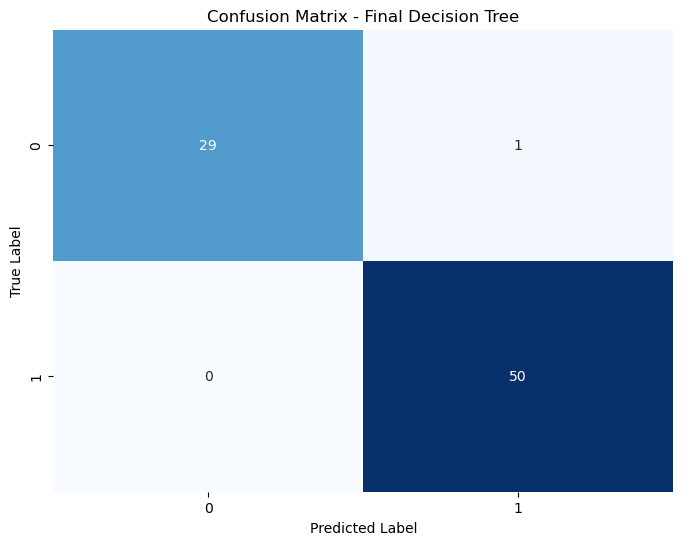

In [39]:
#finaltree classification metrics visualization
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_test_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Final Decision Tree")
plt.show()

In [40]:

# Feature importance

feature_importance = pd.Series(
    final_dt.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Show top 10 important features
print("Top 10 most important features:")
print(feature_importance.head(10))

Top 10 most important features:
hemo          0.828008
sg            0.171992
age           0.000000
rc            0.000000
pe_yes        0.000000
appet_poor    0.000000
cad_yes       0.000000
dm_yes        0.000000
htn_yes       0.000000
ba_present    0.000000
dtype: float64


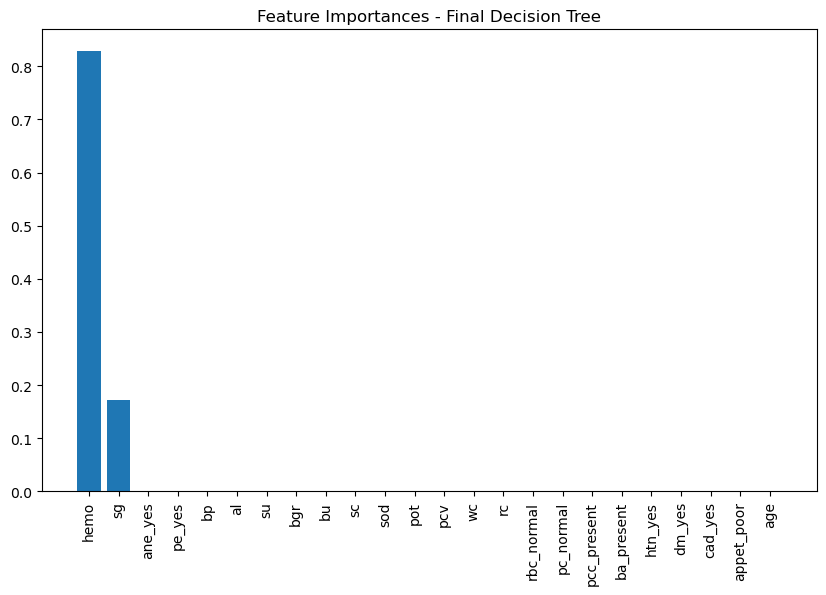

In [41]:
#Final tree bar chart of feature importances
importances = final_dt.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances - Final Decision Tree")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

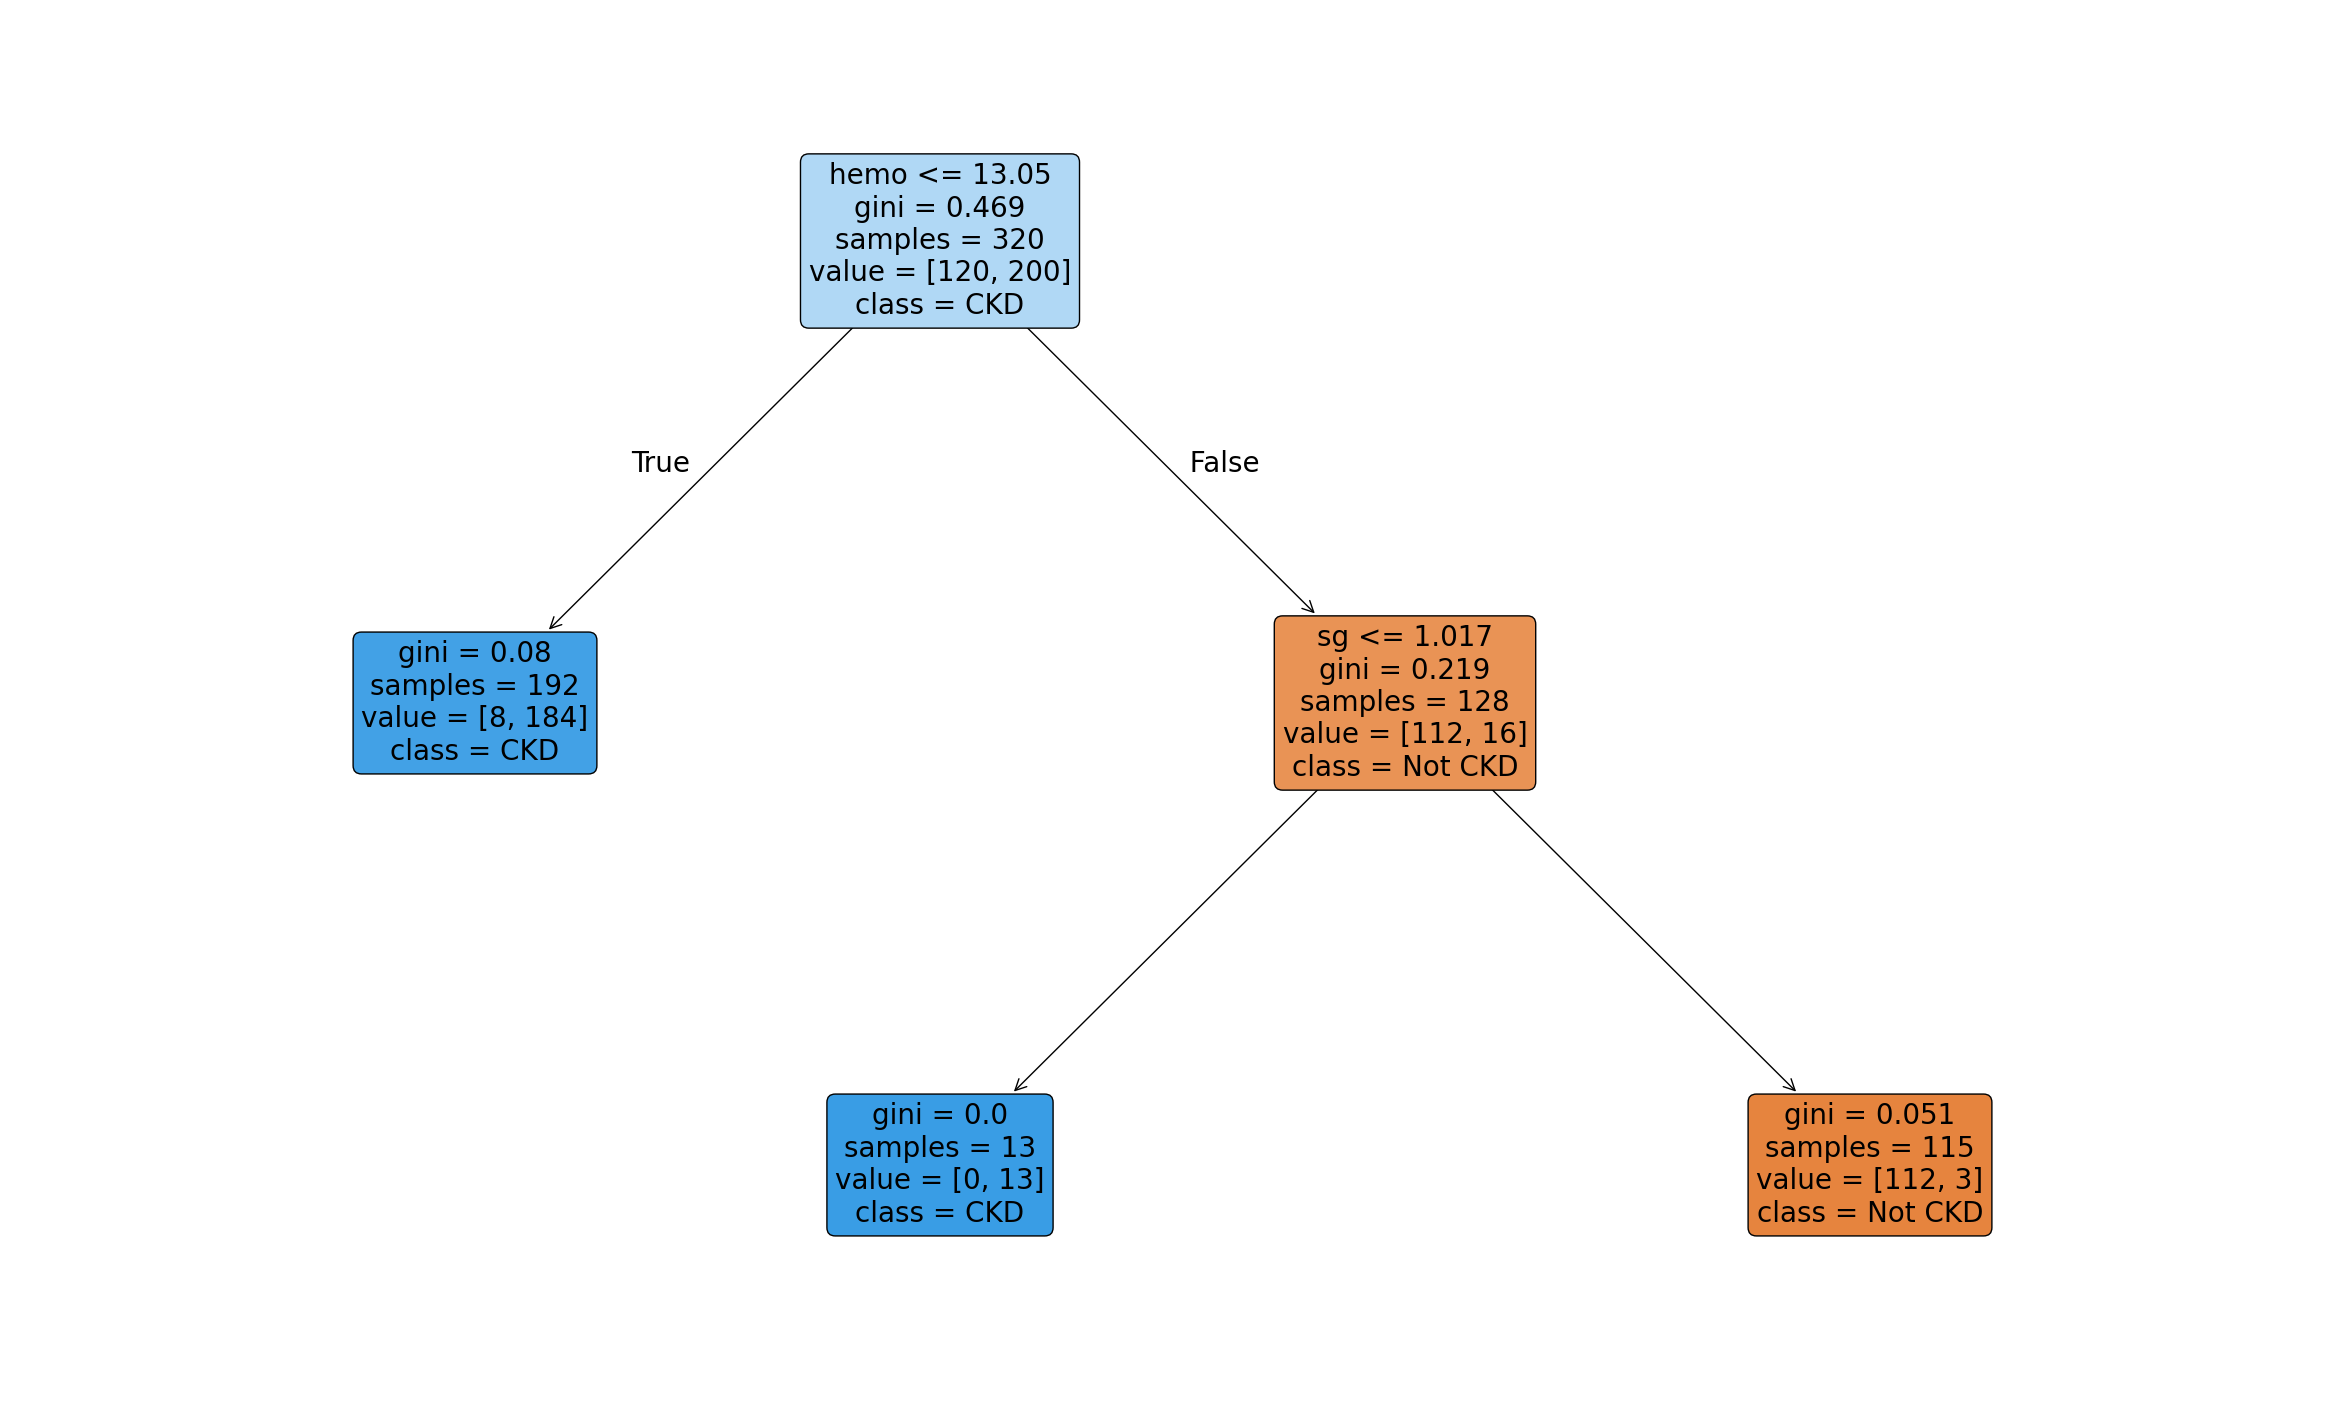

In [42]:
plt.figure(figsize=(30,18))

plot_tree(
    final_dt,
    feature_names=X_train.columns,
    class_names=["Not CKD", "CKD"],
    filled=True,
    rounded=True,
    fontsize=20
)

os.makedirs("results", exist_ok=True)

plt.savefig("results/decision_tree_pruned.png", dpi=300, bbox_inches="tight")
plt.show()


In [43]:
# Predicted probabilities for positive class (CKD)
y_test_proba = final_dt.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.985


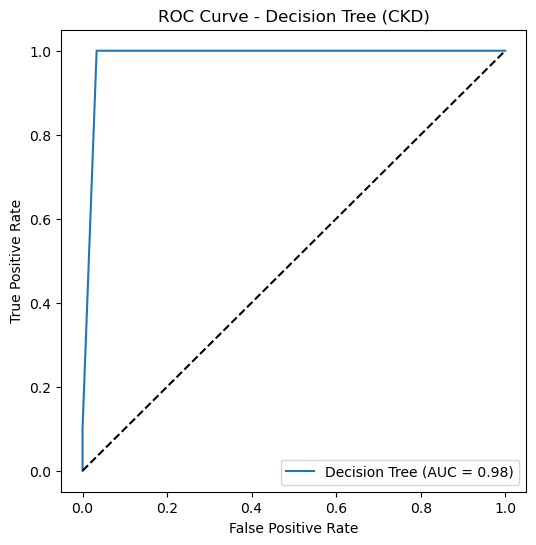

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (CKD)")
plt.legend()
plt.show()


In [52]:
# Use the FINAL model settings
dt_cv = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=best_alpha
)

# 5-fold cross-validation on the TRAINING set only
cv_scores = cross_val_score(
    dt_cv,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy'
)

print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std CV accuracy:", np.std(cv_scores))


Cross-validation accuracies: [0.984375 0.984375 0.921875 0.953125 0.984375]
Mean CV accuracy: 0.965625
Std CV accuracy: 0.024999999999999998
